# Housing Prices Competition for Kaggle Learn Users

## CRISP-DM

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment (N/A)

## 1. Business Understanding

### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that **much more influences price negotiations than the number of bedrooms or a white-picket fence.**

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to **predict the final price of each home.** For each Id in the test set, I must predict the value of the `SalePrice` variable. 

Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Learning Goal

Advanced regression techniques like random forest and gradient boosting will usually perform much better than a Regularized Linear Regression Model. However, I am gonna stick to the latter in this project because my goal is to achieve acceptable performance using a simple regression model.

## 2. Data Understanding

I have the following files:

- **train.csv** - the training set
- **test.csv** - the test set
- **data_description.txt** - full description of each column
- **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [3]:
def load_data(file_path, sep, dtype=None):
    """It loads a .csv file into a dataframe.
    Parameters
    __________
    file_path: string, .csv file path. e.g. '../data/train.csv'
    sep: string, separator
    dtype: dict, data type for data or columns. e.g. {‘a’: np.float64, ‘b’: np.int32, ‘c’: ‘Int64’}
    __________
    Returns: Pandas DataFrame, DF with loaded data.
    
    """
    if dtype == None:
        return pd.read_csv(file_path, sep)
    else:
        return pd.read_csv(file_path, sep, dtype=dtype)

In [5]:
# load in train.csv file
raw_data = load_data('../data/train.csv', sep=',')
raw_data.shape

(1460, 81)

Note there are 79 explanatory features.

`Id` is a unique identifier number and `SalePrice` is the target.

In [6]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# describe numerical features
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


36 out of 79 explanatory features are quantitative or numerical.
The target is quantitative or numerical (Regression problem).

In [9]:
# describe categorical features
raw_data.describe(exclude=np.number)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [24]:
raw_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Data types:**

- Numerical: int and float
- Categorical: object

dtypes: float64(3), int64(35), object(43)

**FEATURE SELECTION FIRST ROUND:**
**Features with many missing values**

- `Alley`: *Type of alley access to property.* - 91 non-null out of 1460 - DROP
- `FireplaceQu`: *Fireplace quality* - 770 non-null out of 1460 - DROP
- `PoolQC`: *Pool quality* - 7 non-null out of 1460 - I NEED TO COMPARE THIS FEATURE WITH `PoolArea`. FURTHER INVESTIGATE.
- `Fence`: *Fence quality* - 281 non-null out of 1460 - DROP
- `MiscFeature`: *Miscellaneous feature not covered in other categories* - 54 non-null out of 1460 - DROP



In [57]:
# store features to be dropped in a list
toDrop_features = ['Alley', 'FireplaceQu', 'Fence', 'MiscFeature']

In [26]:
raw_data['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

### Split training set into train and validation sets

In [27]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(raw_data, test_size=0.10)

### Univariate analysis 
#### Numerical Features

In [34]:
train_data.shape

(1314, 81)

In [33]:
# create a numerical features subset
numerical_cols = train_data.describe().columns
numerical_train = train_data.loc[:, list(numerical_cols)].copy()
numerical_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
489,490,180,21.0,1526,4,8,1970,2002,0.0,515,...,0,0,0,0,0,0,0,5,2009,86000
75,76,180,21.0,1596,4,5,1973,1973,0.0,462,...,120,101,0,0,0,0,0,11,2009,91000
1112,1113,20,73.0,7100,5,7,1957,1957,0.0,708,...,0,0,0,0,0,0,0,7,2006,129900
47,48,20,84.0,11096,8,5,2006,2006,0.0,24,...,0,146,0,0,0,0,0,7,2007,249700
1270,1271,40,NaN,23595,7,6,1979,1979,0.0,1258,...,268,0,0,0,0,0,0,4,2010,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,60,65.0,8125,7,5,2006,2006,0.0,0,...,0,50,0,0,0,0,0,8,2006,197000
1102,1103,20,70.0,7000,5,7,1960,2002,45.0,588,...,0,16,0,0,0,0,0,4,2007,135000
1345,1346,30,50.0,6000,4,4,1920,1950,0.0,250,...,0,0,168,0,0,0,0,7,2007,108500
389,390,60,96.0,12474,10,5,2007,2008,272.0,1280,...,196,134,0,0,0,0,0,8,2008,426000


In [35]:
def print_summary_statistics(data, variable, outliers):
    if not outliers:
        mean = data[variable].mean()
        mode = data[variable].mode()[0]
        max_val = data[variable].max()
        min_val = data[variable].min()
        stdev = np.std(np.array(data[variable]))
        print("The mean of the variable {} is {:.2f}.".format(variable, mean))
        print("The mode of the variable {} is {:.2f}.".format(variable, mode))
        print("The max value of the variable {} is {:.2f}.".format(variable, max_val))
        print("The min value of the variable {} is {:.2f}.".format(variable, min_val))
        print("The Standard Deviation of the variable {} is {:.2f}.".format(variable, stdev))
    else:
        median = data[variable].median()
        mode = data[variable].mode()[0]
        max_val = data[variable].max()
        min_val = data[variable].min()
        p75, p25 = np.percentile(np.array(data[variable]), (75.0, 25.0))
        IQR = p75 - p25
        print("The median of the variable {} is {:.2f}.".format(variable, median))
        print("The mode of the variable {} is {:.2f}.".format(variable, mode))
        print("The max value of the variable {} is {:.2f}.".format(variable, max_val))
        print("The min value of the variable {} is {:.2f}.".format(variable, min_val))
        print("The first quartile of the variable {} is {:.2f}.".format(variable, p25))
        print("The third quartile of the variable {} is {:.2f}.".format(variable, p75))
        print("The IQR of the variable {} is {:.2f}.".format(variable, IQR))

In [36]:
def plot_hist(data, variable, bins):
    plt.figure(figsize=(12,7))
    plt.hist(data[variable], color='b', align='left', bins=bins)
    plt.xlabel("Values")
    plt.ylabel("Freq")
    plt.title("Distribution of " + variable)
    plt.show()

In [40]:
print(numerical_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [51]:
# go through all the numerical features, print summary statistics and plot quick hist
# MSSubClass. Identifies the type of dwelling involved in the sale.
feature = 'MSSubClass'
print("Feature name: {}".format(feature))

Feature name: MSSubClass


`MSSubClass` has been already encoded. It is a categorical variable that identifies the type of dwelling involved in the sale.

In [48]:
# check value counts
numerical_train.value_counts('MSSubClass').sort_index()

MSSubClass
20     487
30      61
40       4
45      11
50     130
60     264
70      54
75      14
80      57
85      19
90      44
120     74
160     56
180     10
190     29
dtype: int64

The values corresponds with the data description. A summary of the statistics and a hist are misleading in this case.

Feature name: LotFrontage
The median of the variable LotFrontage is 70.00.
The mode of the variable LotFrontage is 60.00.
The max value of the variable LotFrontage is 313.00.
The min value of the variable LotFrontage is 21.00.
The first quartile of the variable LotFrontage is nan.
The third quartile of the variable LotFrontage is nan.
The IQR of the variable LotFrontage is nan.


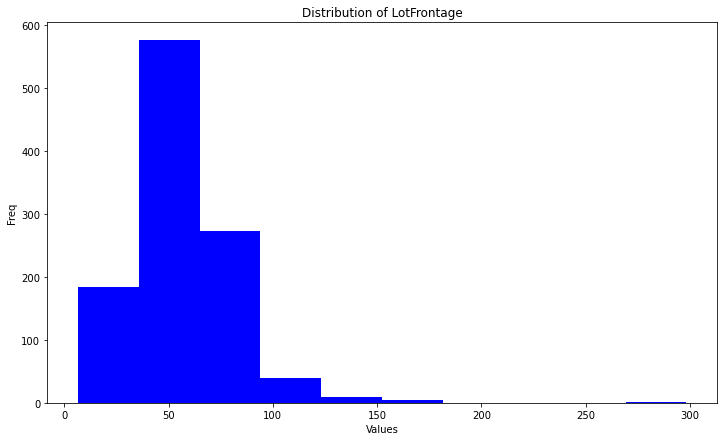

In [53]:
# LotFrontage: Linear feet of street connected to property
feature = 'LotFrontage'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

There seems to be some outliers and also missing values.

In [54]:
numerical_train['LotFrontage'].loc[numerical_train['LotFrontage'] > 200]

934     313.0
1298    313.0
Name: LotFrontage, dtype: float64

In [55]:
numerical_train.loc[numerical_train['LotFrontage'] > 200]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
934,935,20,313.0,27650,7,7,1960,2007,0.0,425,...,0,0,0,0,0,0,0,11,2008,242000
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,214,292,0,0,0,480,0,1,2008,160000


There are a couple of houses that have a much larger linear feet of street connected to property. - DROP these instances.

In [77]:
# store in a list
outliers_ids = [935, 1299]

Feature name: LotArea
The median of the variable LotArea is 9444.50.
The mode of the variable LotArea is 9600.00.
The max value of the variable LotArea is 215245.00.
The min value of the variable LotArea is 1477.00.
The first quartile of the variable LotArea is 7500.00.
The third quartile of the variable LotArea is 11522.50.
The IQR of the variable LotArea is 4022.50.


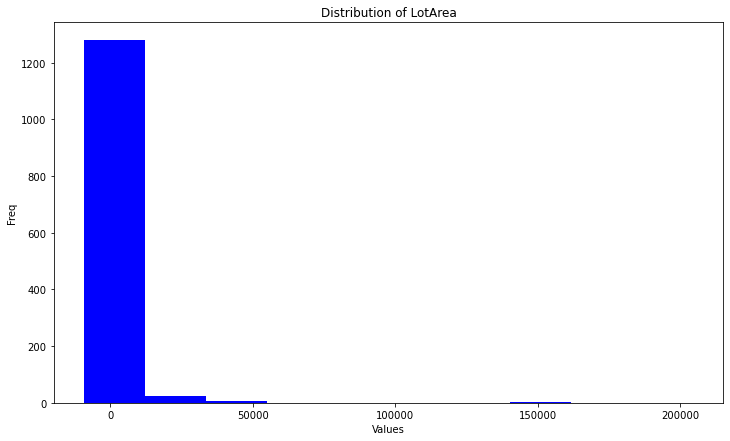

In [64]:
# LotArea: Lot size in square feet
feature = 'LotArea'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

There are outliers. By looking at the hist, drop instances with an area larger than 60000.

In [66]:
numerical_train.loc[numerical_train['LotArea'] > 60000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
706,707,20,NaN,115149,7,5,1971,2002,351.0,1219,...,380,48,0,0,0,0,0,6,2007,302000
335,336,190,NaN,164660,5,6,1965,1965,0.0,1249,...,670,0,0,0,0,0,700,8,2008,228950
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,214,292,0,0,0,480,0,1,2008,160000
313,314,20,150.0,215245,7,5,1965,1965,0.0,1236,...,0,0,0,0,0,0,0,6,2009,375000
249,250,50,NaN,159000,6,7,1958,2006,472.0,697,...,0,98,0,0,0,0,500,6,2007,277000
451,452,20,62.0,70761,7,5,1975,1975,0.0,655,...,200,54,0,0,0,0,0,12,2006,280000


In [78]:
# store ids in list
outliers_ids.extend(list(numerical_train.loc[numerical_train['LotArea'] > 60000]['Id'].values))

Feature name: OverallQual


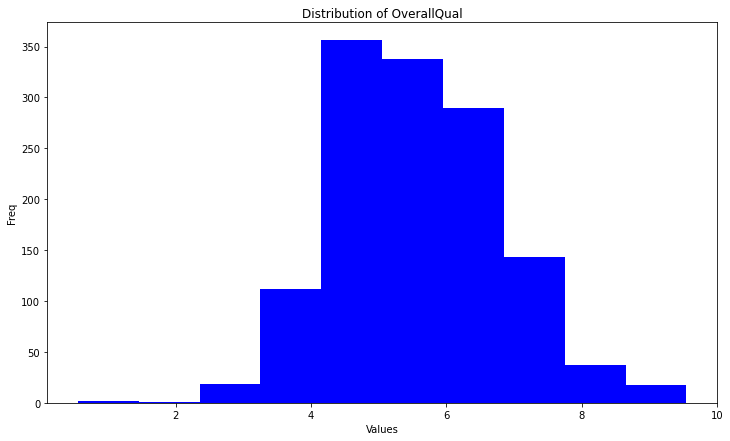

In [81]:
# OverallQual: Rates the overall material and finish of the house
feature = 'OverallQual'
print("Feature name: {}".format(feature))
plot_hist(numerical_train, feature, 10)

This variable has been already encoded. It is a ordinal variable. It follows a normal distribution.

Feature name: OverallCond


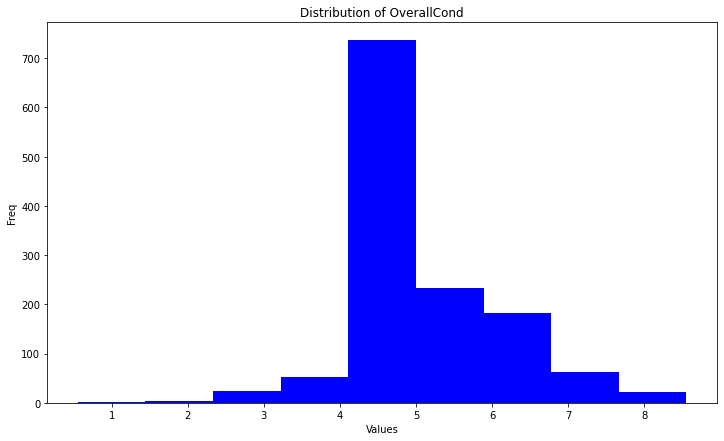

In [83]:
# OverallCond: Rates the overall condition of the house
feature = 'OverallCond'
print("Feature name: {}".format(feature))
plot_hist(numerical_train, feature, 9)

In [85]:
numerical_train['OverallCond'].value_counts().sort_index()

1      1
2      4
3     23
4     52
5    736
6    233
7    182
8     62
9     21
Name: OverallCond, dtype: int64

This variable has been already encoded. It is an ordinal variable. It follows an approximately normal distribution. No house has been qualified with 10 Very Excellent.

Feature name: YearBuilt
The median of the variable YearBuilt is 1972.00.
The mode of the variable YearBuilt is 2006.00.
The max value of the variable YearBuilt is 2010.00.
The min value of the variable YearBuilt is 1872.00.
The first quartile of the variable YearBuilt is 1954.00.
The third quartile of the variable YearBuilt is 2000.00.
The IQR of the variable YearBuilt is 46.00.


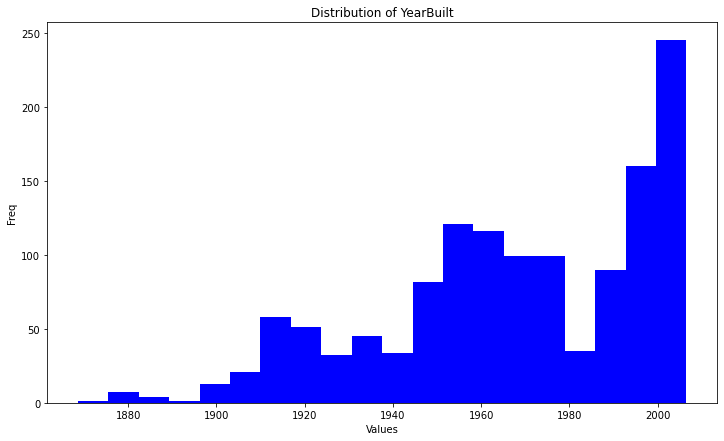

In [87]:
# YearBuilt: Original construction date
feature = 'YearBuilt'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 20)

`Yearbuilt` is exponentially distributed. It can be crearly seen how the number of houses built per year has varied over the years with a boom in construction probably associated with the property boom of the late 1980s in the US.

I will apply a log transformation to this variable.

In [88]:
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

I will drop this feature because the overall condition will give this information for the majority of the houses.

In [89]:
toDrop_features.append('YearRemodAdd')

Feature name: MasVnrArea
The median of the variable MasVnrArea is 0.00.
The mode of the variable MasVnrArea is 0.00.
The max value of the variable MasVnrArea is 1600.00.
The min value of the variable MasVnrArea is 0.00.
The first quartile of the variable MasVnrArea is nan.
The third quartile of the variable MasVnrArea is nan.
The IQR of the variable MasVnrArea is nan.


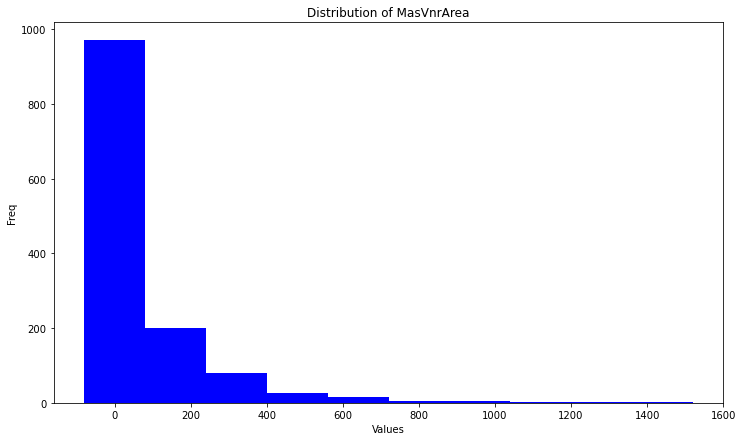

In [91]:
# MasVnrArea: Masonry veneer area in square feet
feature = 'MasVnrArea'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [101]:
# plot a hist with only houses that have masonry veneer
numerical_train['MasVnrArea'].loc[numerical_train['MasVnrArea'] > 0].count()

526

It seems that most of the properties do not have Masonry veneer. I will DROP this feature.

Feature name: BsmtFinSF1
The median of the variable BsmtFinSF1 is 397.50.
The mode of the variable BsmtFinSF1 is 0.00.
The max value of the variable BsmtFinSF1 is 5644.00.
The min value of the variable BsmtFinSF1 is 0.00.
The first quartile of the variable BsmtFinSF1 is 0.00.
The third quartile of the variable BsmtFinSF1 is 724.00.
The IQR of the variable BsmtFinSF1 is 724.00.


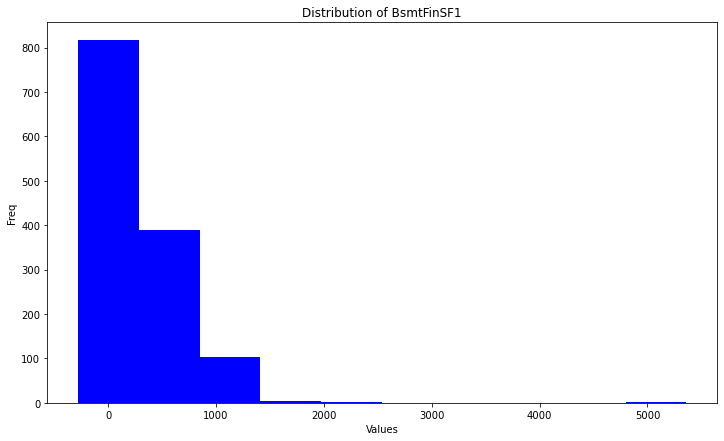

In [102]:
# BsmtFinSF1: Type 1 finished square feet
feature = 'BsmtFinSF1'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

There are some outliers. Let's add them to be dropped.

In [103]:
numerical_train.loc[numerical_train['BsmtFinSF1'] > 3000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,214,292,0,0,0,480,0,1,2008,160000


In [104]:
outliers_ids.extend(list(numerical_train.loc[numerical_train['BsmtFinSF1'] > 3000]['Id'].values))

Feature name: BsmtFinSF2
The median of the variable BsmtFinSF2 is 0.00.
The mode of the variable BsmtFinSF2 is 0.00.
The max value of the variable BsmtFinSF2 is 1474.00.
The min value of the variable BsmtFinSF2 is 0.00.
The first quartile of the variable BsmtFinSF2 is 0.00.
The third quartile of the variable BsmtFinSF2 is 0.00.
The IQR of the variable BsmtFinSF2 is 0.00.


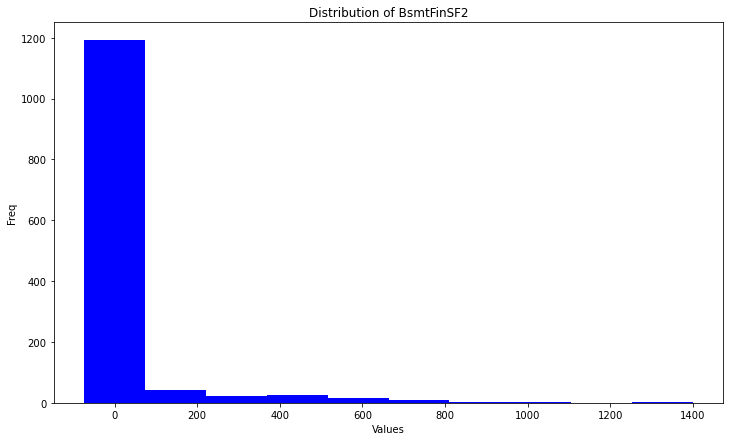

In [106]:
# BsmtFinSF2: Type 2 finished square feet
feature = 'BsmtFinSF2'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [107]:
numerical_train['BsmtFinSF2'].value_counts()

0      1160
180       5
374       3
294       2
182       2
       ... 
506       1
531       1
544       1
546       1
352       1
Name: BsmtFinSF2, Length: 131, dtype: int64

I will drop this variable which is the second type of basement area and also the corresponding categorical because many properties do not have a second type.

In [109]:
toDrop_features.append('BsmtFinSF2')
toDrop_features.append('BsmtFinType2')

Feature name: BsmtUnfSF
The median of the variable BsmtUnfSF is 466.50.
The mode of the variable BsmtUnfSF is 0.00.
The max value of the variable BsmtUnfSF is 2336.00.
The min value of the variable BsmtUnfSF is 0.00.
The first quartile of the variable BsmtUnfSF is 220.25.
The third quartile of the variable BsmtUnfSF is 803.75.
The IQR of the variable BsmtUnfSF is 583.50.


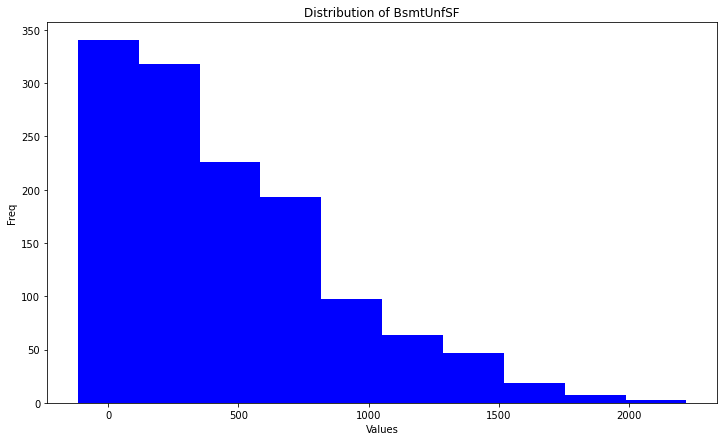

In [111]:
# BsmtUnfSF: Unfinished square feet of basement area
feature = 'BsmtUnfSF'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

I will drop this feature as it is not relevant to many properties and my intuition tells me it is unlikely that this feature will be relevant.

In [117]:
toDrop_features.append('BsmtUnfSF')

Feature name: TotalBsmtSF
The median of the variable TotalBsmtSF is 992.00.
The mode of the variable TotalBsmtSF is 864.00.
The max value of the variable TotalBsmtSF is 6110.00.
The min value of the variable TotalBsmtSF is 0.00.
The first quartile of the variable TotalBsmtSF is 798.25.
The third quartile of the variable TotalBsmtSF is 1280.25.
The IQR of the variable TotalBsmtSF is 482.00.


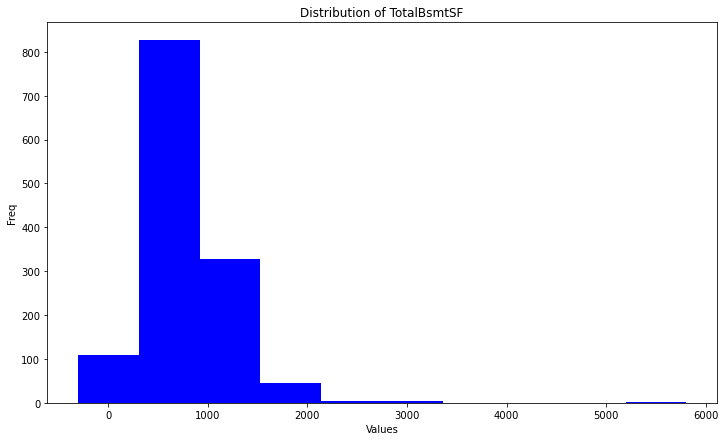

In [118]:
# TotalBsmtSF: Total square feet of basement area
feature = 'TotalBsmtSF'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

It seems to follow a normal distribution but there are outliers. Thinking from a business domain perspective, this should be an important feature.

In [119]:
numerical_train.loc[numerical_train['TotalBsmtSF'] > 3000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
496,497,20,NaN,12692,8,5,1992,1993,0.0,1231,...,264,75,291,0,0,0,0,5,2007,430000
523,524,60,130.0,40094,10,5,2007,2008,762.0,2260,...,208,406,0,0,0,0,0,10,2007,184750
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,214,292,0,0,0,480,0,1,2008,160000
332,333,20,85.0,10655,8,5,2003,2004,296.0,1124,...,0,0,0,0,0,0,0,10,2009,284000
440,441,20,105.0,15431,10,5,2008,2008,200.0,1767,...,0,72,0,0,170,0,0,4,2009,555000


In [120]:
outliers_ids.extend(list(numerical_train.loc[numerical_train['TotalBsmtSF'] > 3000]['Id'].values))

Feature name: 1stFlrSF
The median of the variable 1stFlrSF is 1086.00.
The mode of the variable 1stFlrSF is 864.00.
The max value of the variable 1stFlrSF is 4692.00.
The min value of the variable 1stFlrSF is 334.00.
The first quartile of the variable 1stFlrSF is 886.25.
The third quartile of the variable 1stFlrSF is 1383.00.
The IQR of the variable 1stFlrSF is 496.75.


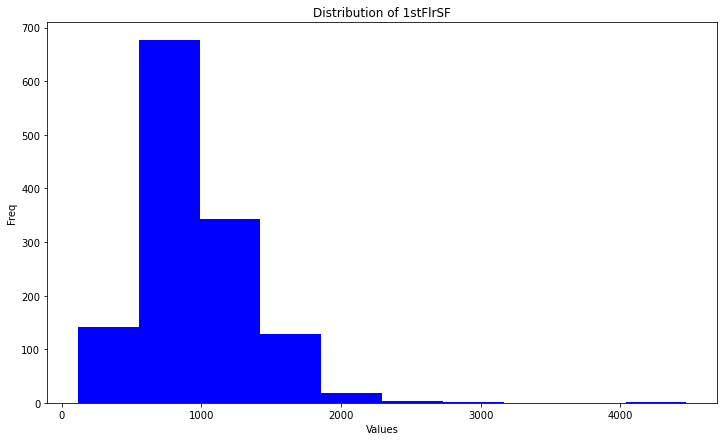

In [122]:
# 1stFlrSF: First Floor square feet
feature = '1stFlrSF'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

It seems to follow a normal distribution but there are outliers. Thinking from a business domain perspective, this should be an important feature.

In [123]:
numerical_train.loc[numerical_train['1stFlrSF'] > 3000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
496,497,20,NaN,12692,8,5,1992,1993,0.0,1231,...,264,75,291,0,0,0,0,5,2007,430000
523,524,60,130.0,40094,10,5,2007,2008,762.0,2260,...,208,406,0,0,0,0,0,10,2007,184750
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,214,292,0,0,0,480,0,1,2008,160000


In [124]:
outliers_ids.extend(list(numerical_train.loc[numerical_train['1stFlrSF'] > 3000]['Id'].values))

Feature name: 2ndFlrSF
The median of the variable 2ndFlrSF is 0.00.
The mode of the variable 2ndFlrSF is 0.00.
The max value of the variable 2ndFlrSF is 2065.00.
The min value of the variable 2ndFlrSF is 0.00.
The first quartile of the variable 2ndFlrSF is 0.00.
The third quartile of the variable 2ndFlrSF is 728.00.
The IQR of the variable 2ndFlrSF is 728.00.


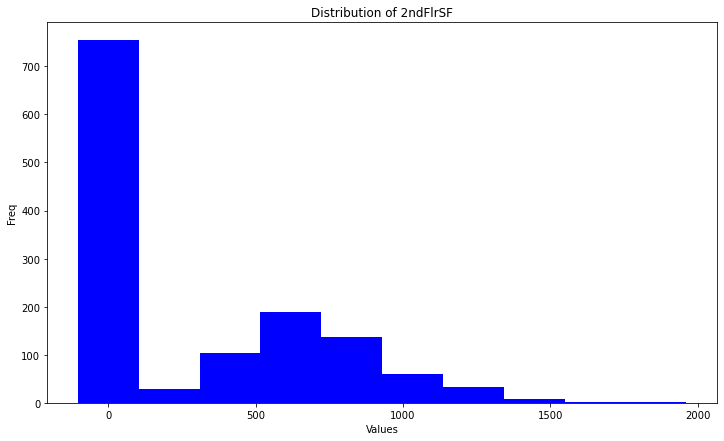

In [125]:
# 2ndFlrSF: Second floor square feet
feature = '2ndFlrSF'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

I can see that there is a significant number of houses without a second floor.

In [128]:
# number of houses without a second floor
numerical_train['2ndFlrSF'].loc[numerical_train['2ndFlrSF'] > 0].count()

563

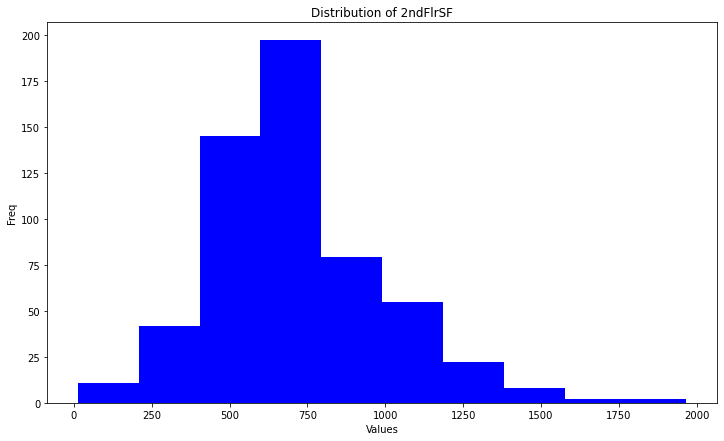

In [130]:
# plot hist without houses that do not have a second floor
plot_hist(numerical_train.loc[numerical_train['2ndFlrSF'] > 0, :], '2ndFlrSF', 10)

I would assume the following:

- The existance of a second floor is positively correlated with `SalePrice`
- `2ndFlrSF`is positively correlated with `SalePrice`

I can do here a bit of feature engineering and transform this feature. I will deal with this in later steps.

Feature name: LowQualFinSF
The median of the variable LowQualFinSF is 0.00.
The mode of the variable LowQualFinSF is 0.00.
The max value of the variable LowQualFinSF is 572.00.
The min value of the variable LowQualFinSF is 0.00.
The first quartile of the variable LowQualFinSF is 0.00.
The third quartile of the variable LowQualFinSF is 0.00.
The IQR of the variable LowQualFinSF is 0.00.


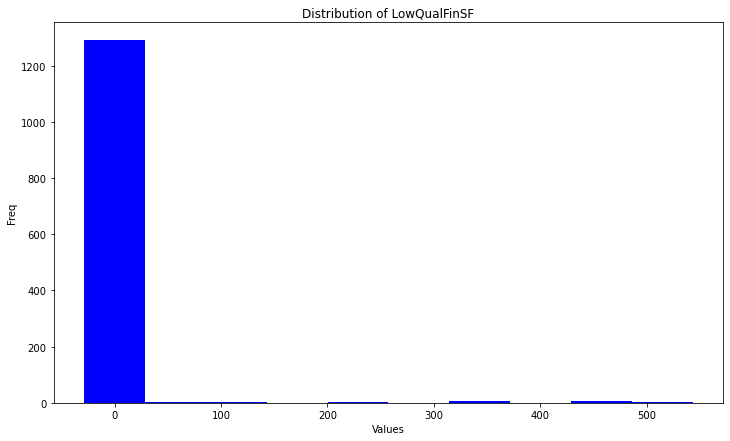

In [131]:
# LowQualFinSF: Low quality finished square feet (all floors)
feature = 'LowQualFinSF'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

It seems that just a bunch of houses have low quality floors.

In [133]:
numerical_train.loc[numerical_train['LowQualFinSF'] > 0, 'LowQualFinSF']

1440    384
125     234
729     360
831      80
263     390
829      80
1173    479
868      53
185     572
198     371
406     473
873     232
267     420
883     481
589     156
945     120
88      513
1349    205
635     515
170     528
197     392
1364     80
1009    514
51      360
1031    397
Name: LowQualFinSF, dtype: int64

I could come up with a new feature that combines floors information. Will do this later.

Feature name: GrLivArea
The median of the variable GrLivArea is 1456.00.
The mode of the variable GrLivArea is 864.00.
The max value of the variable GrLivArea is 5642.00.
The min value of the variable GrLivArea is 334.00.
The first quartile of the variable GrLivArea is 1125.25.
The third quartile of the variable GrLivArea is 1776.00.
The IQR of the variable GrLivArea is 650.75.


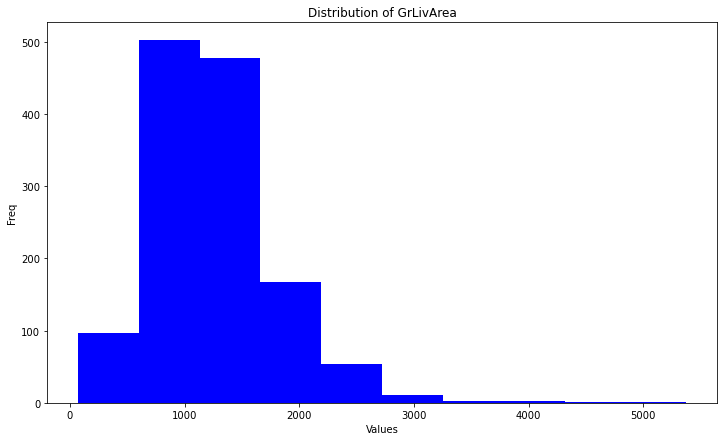

In [134]:
# GrLivArea: Above grade (ground) living area square feet
feature = 'GrLivArea'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

There are some outliers

In [136]:
numerical_train.loc[numerical_train['GrLivArea'] > 3500]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
523,524,60,130.0,40094,10,5,2007,2008,762.0,2260,...,208,406,0,0,0,0,0,10,2007,184750
185,186,75,90.0,22950,10,9,1892,1993,0.0,0,...,0,260,0,0,410,0,0,6,2006,475000
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5644,...,214,292,0,0,0,480,0,1,2008,160000
1182,1183,60,160.0,15623,10,5,1996,1996,0.0,2096,...,171,78,0,0,0,555,0,7,2007,745000
1169,1170,60,118.0,35760,10,5,1995,1996,1378.0,1387,...,361,76,0,0,0,0,0,7,2006,625000
691,692,60,104.0,21535,10,6,1994,1995,1170.0,1455,...,382,50,0,0,0,0,0,1,2007,755000


In [137]:
outliers_ids.extend(list(numerical_train.loc[numerical_train['GrLivArea'] > 3500]['Id'].values))

Feature name: BsmtFullBath
The median of the variable BsmtFullBath is 0.00.
The mode of the variable BsmtFullBath is 0.00.
The max value of the variable BsmtFullBath is 2.00.
The min value of the variable BsmtFullBath is 0.00.
The first quartile of the variable BsmtFullBath is 0.00.
The third quartile of the variable BsmtFullBath is 1.00.
The IQR of the variable BsmtFullBath is 1.00.


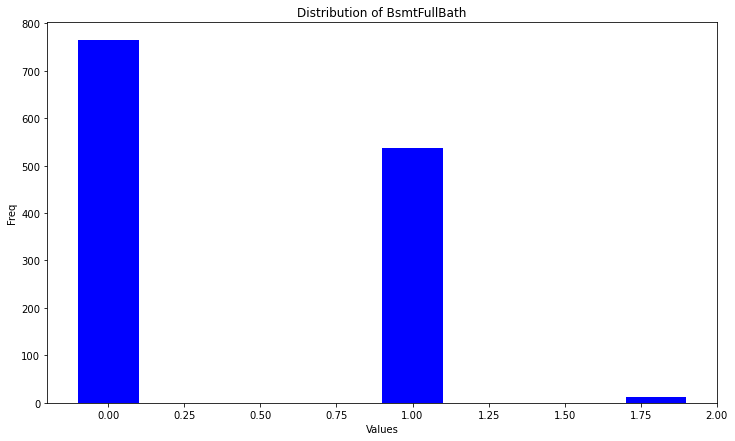

In [139]:
# BsmtFullBath: Basement full bathrooms
feature = 'BsmtFullBath'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [140]:
# check value counts
numerical_train['BsmtFullBath'].value_counts().sort_index()

0    764
1    537
2     13
Name: BsmtFullBath, dtype: int64

This numerical variable can be interpreted as an ordinal variable.

Feature name: BsmtHalfBath
The median of the variable BsmtHalfBath is 0.00.
The mode of the variable BsmtHalfBath is 0.00.
The max value of the variable BsmtHalfBath is 2.00.
The min value of the variable BsmtHalfBath is 0.00.
The first quartile of the variable BsmtHalfBath is 0.00.
The third quartile of the variable BsmtHalfBath is 0.00.
The IQR of the variable BsmtHalfBath is 0.00.


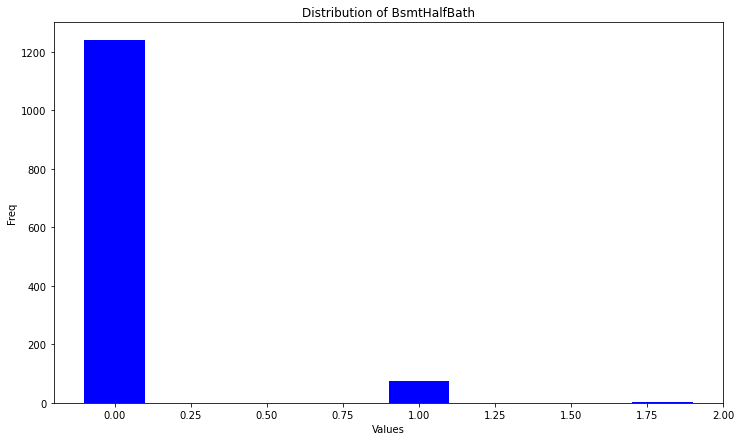

In [141]:
# BsmtHalfBath: Basement half bathrooms
feature = 'BsmtHalfBath'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [142]:
# check value counts
numerical_train['BsmtHalfBath'].value_counts().sort_index()

0    1239
1      73
2       2
Name: BsmtHalfBath, dtype: int64

Similar to Basement Full Bathrooms

Feature name: FullBath
The median of the variable FullBath is 2.00.
The mode of the variable FullBath is 2.00.
The max value of the variable FullBath is 3.00.
The min value of the variable FullBath is 0.00.
The first quartile of the variable FullBath is 1.00.
The third quartile of the variable FullBath is 2.00.
The IQR of the variable FullBath is 1.00.


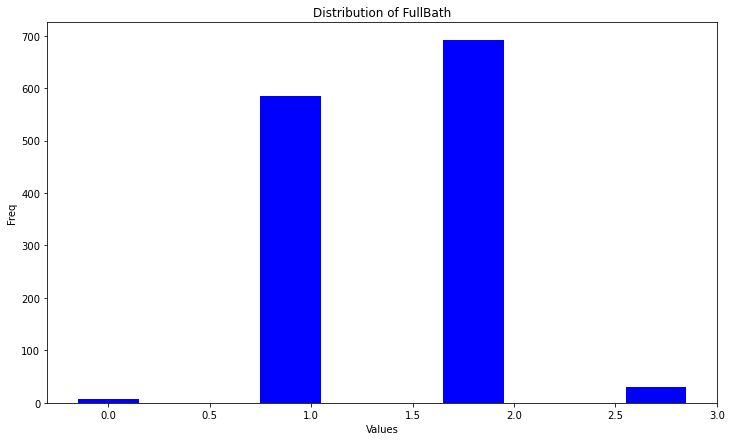

In [143]:
# FullBath: Full bathrooms above grade
feature = 'FullBath'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Feature name: HalfBath
The median of the variable HalfBath is 0.00.
The mode of the variable HalfBath is 0.00.
The max value of the variable HalfBath is 2.00.
The min value of the variable HalfBath is 0.00.
The first quartile of the variable HalfBath is 0.00.
The third quartile of the variable HalfBath is 1.00.
The IQR of the variable HalfBath is 1.00.


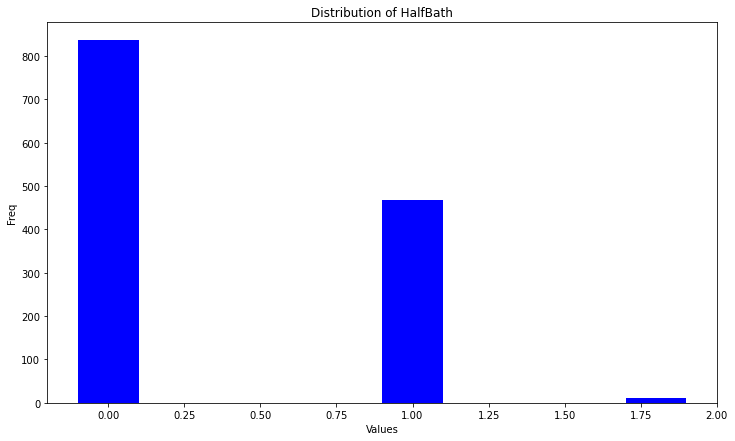

In [144]:
# HalfBath: Half baths above grade
feature = 'HalfBath'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

`FullBath` and `HalfBath` are ordinal features.

Feature name: BedroomAbvGr
The median of the variable BedroomAbvGr is 3.00.
The mode of the variable BedroomAbvGr is 3.00.
The max value of the variable BedroomAbvGr is 8.00.
The min value of the variable BedroomAbvGr is 0.00.
The first quartile of the variable BedroomAbvGr is 2.00.
The third quartile of the variable BedroomAbvGr is 3.00.
The IQR of the variable BedroomAbvGr is 1.00.


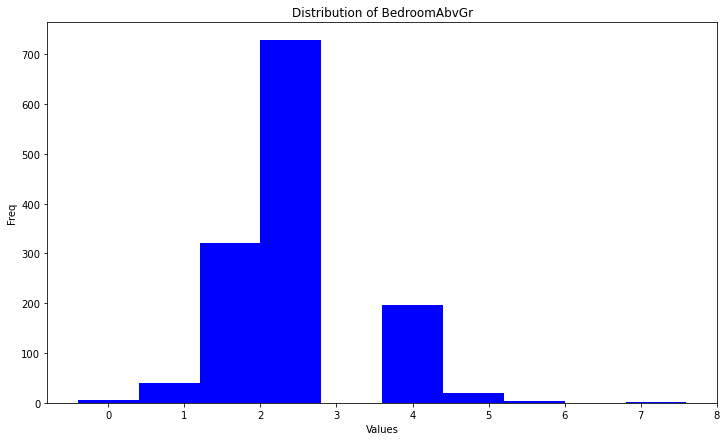

In [145]:
# BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
feature = 'BedroomAbvGr'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Ordinal data. It looks fine.

Feature name: KitchenAbvGr
The median of the variable KitchenAbvGr is 1.00.
The mode of the variable KitchenAbvGr is 1.00.
The max value of the variable KitchenAbvGr is 3.00.
The min value of the variable KitchenAbvGr is 0.00.
The first quartile of the variable KitchenAbvGr is 1.00.
The third quartile of the variable KitchenAbvGr is 1.00.
The IQR of the variable KitchenAbvGr is 0.00.


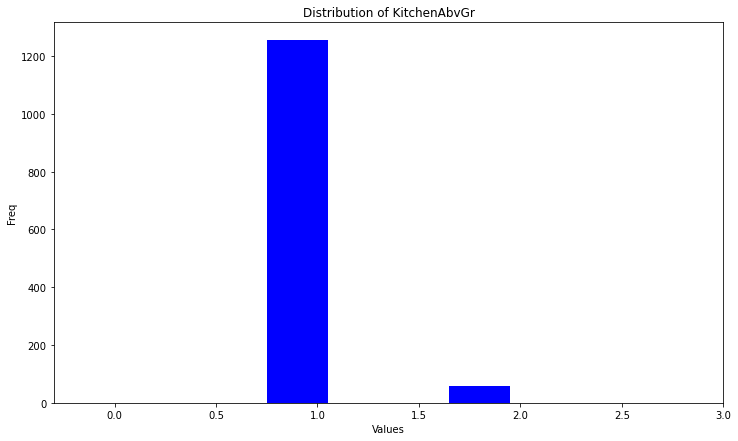

In [146]:
# KitchenAbvGr: Kitchens above grade
feature = 'KitchenAbvGr'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Ordinal data. It looks fine. I can combine this attribute with `KitchenQual`.

Feature name: TotRmsAbvGrd
The median of the variable TotRmsAbvGrd is 6.00.
The mode of the variable TotRmsAbvGrd is 6.00.
The max value of the variable TotRmsAbvGrd is 14.00.
The min value of the variable TotRmsAbvGrd is 2.00.
The first quartile of the variable TotRmsAbvGrd is 5.00.
The third quartile of the variable TotRmsAbvGrd is 7.00.
The IQR of the variable TotRmsAbvGrd is 2.00.


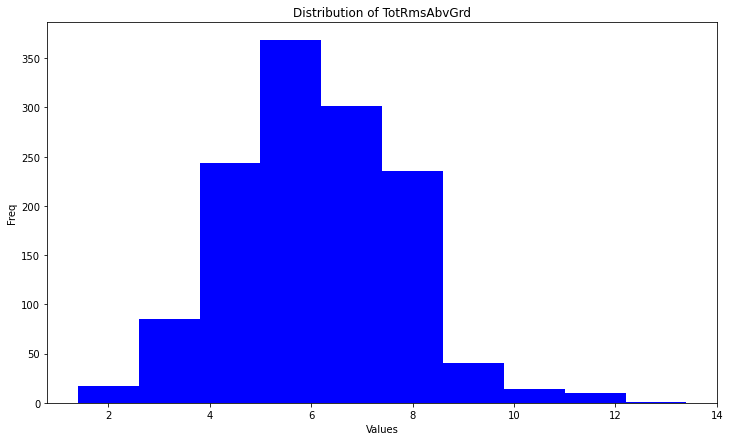

In [147]:
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
feature = 'TotRmsAbvGrd'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Feature name: Fireplaces
The median of the variable Fireplaces is 1.00.
The mode of the variable Fireplaces is 0.00.
The max value of the variable Fireplaces is 3.00.
The min value of the variable Fireplaces is 0.00.
The first quartile of the variable Fireplaces is 0.00.
The third quartile of the variable Fireplaces is 1.00.
The IQR of the variable Fireplaces is 1.00.


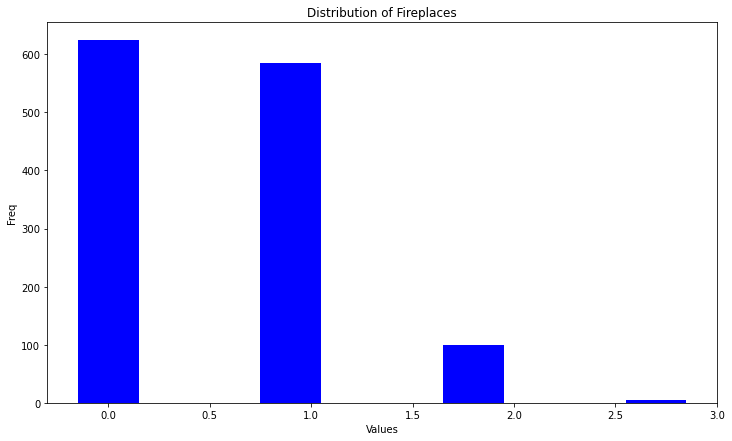

In [148]:
# Fireplaces: Number of fireplaces
feature = 'Fireplaces'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [150]:
# GarageYrBlt: Year garage was built

`YearBuilt` is probably enough. Drop this variable.

In [151]:
toDrop_features.append('GarageYrBlt')

In [152]:
# GarageFinish: Interior finish of the garage

It is unlikely that this feature will be relevant. Drop for simplicity.

In [153]:
toDrop_features.append('GarageFinish')

In [154]:
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet

This 2 features will likely present collinearity. I will combine them in a single feature.

Feature name: GarageCars
The median of the variable GarageCars is 2.00.
The mode of the variable GarageCars is 2.00.
The max value of the variable GarageCars is 4.00.
The min value of the variable GarageCars is 0.00.
The first quartile of the variable GarageCars is 1.00.
The third quartile of the variable GarageCars is 2.00.
The IQR of the variable GarageCars is 1.00.


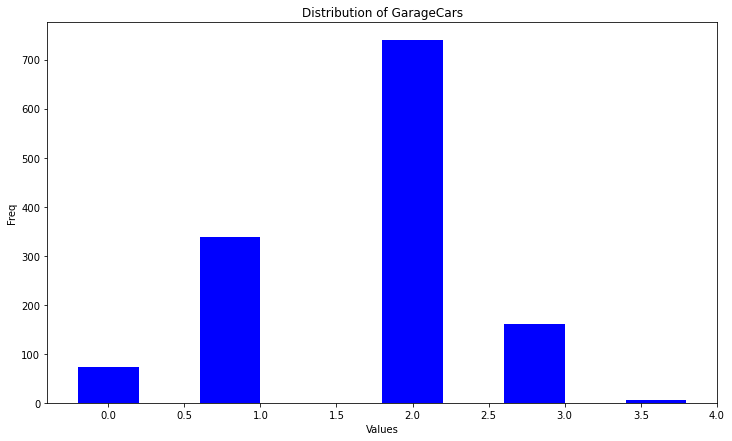

In [155]:
feature = 'GarageCars'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Feature name: GarageArea
The median of the variable GarageArea is 480.00.
The mode of the variable GarageArea is 0.00.
The max value of the variable GarageArea is 1418.00.
The min value of the variable GarageArea is 0.00.
The first quartile of the variable GarageArea is 331.50.
The third quartile of the variable GarageArea is 576.00.
The IQR of the variable GarageArea is 244.50.


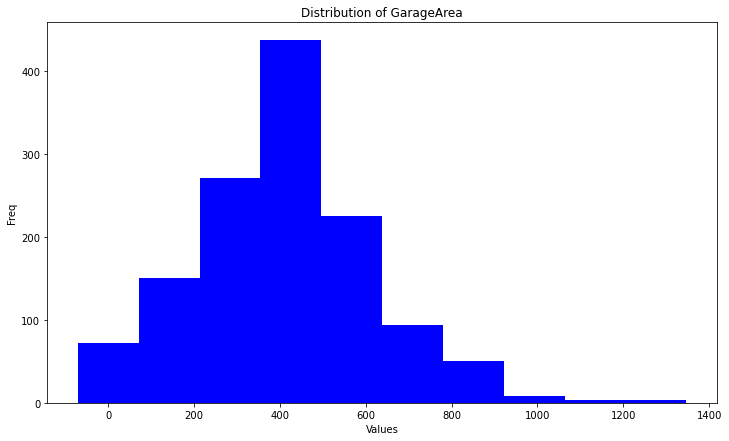

In [156]:
feature = 'GarageArea'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Feature name: WoodDeckSF
The median of the variable WoodDeckSF is 0.00.
The mode of the variable WoodDeckSF is 0.00.
The max value of the variable WoodDeckSF is 736.00.
The min value of the variable WoodDeckSF is 0.00.
The first quartile of the variable WoodDeckSF is 0.00.
The third quartile of the variable WoodDeckSF is 168.00.
The IQR of the variable WoodDeckSF is 168.00.


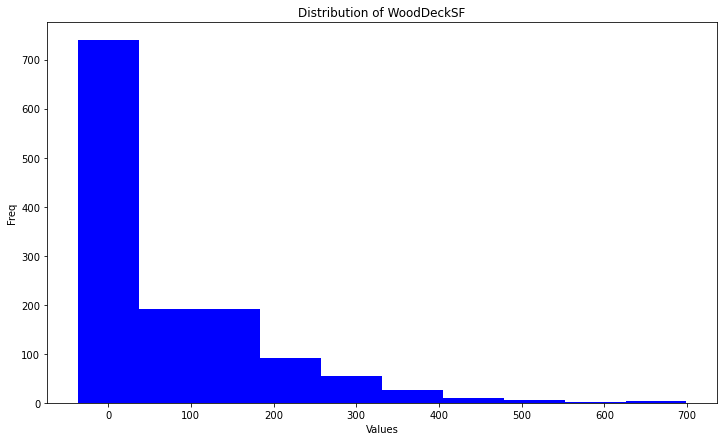

In [157]:
# WoodDeckSF: Wood deck area in square feet
feature = 'WoodDeckSF'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [158]:
# check value counts
numerical_train['WoodDeckSF'].value_counts().sort_index()

0      694
12       2
24       2
26       2
28       2
      ... 
635      1
668      1
670      1
728      1
736      1
Name: WoodDeckSF, Length: 254, dtype: int64

It is unlikely that this feature will be relevant. I will drop it.

In [159]:
toDrop_features.append('WoodDeckSF')

I am not going to consider the following features for simplicity:

{WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'}

It is unlikely that the porch will have a significant weight on the price of the house.

In [163]:
toDrop_features.extend(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

Feature name: PoolArea
The median of the variable PoolArea is 0.00.
The mode of the variable PoolArea is 0.00.
The max value of the variable PoolArea is 738.00.
The min value of the variable PoolArea is 0.00.
The first quartile of the variable PoolArea is 0.00.
The third quartile of the variable PoolArea is 0.00.
The IQR of the variable PoolArea is 0.00.


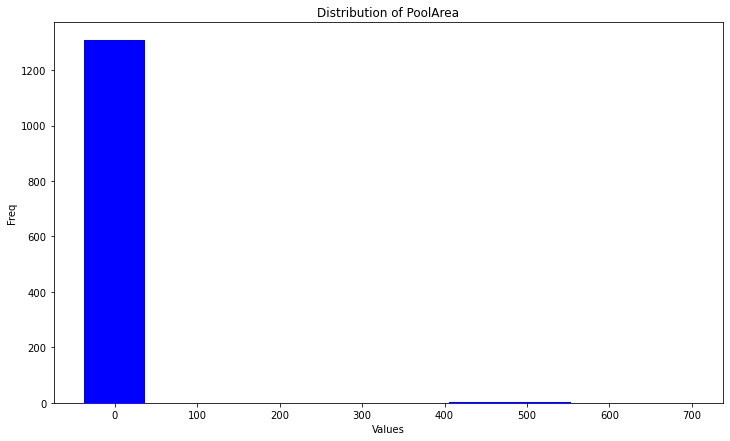

In [165]:
# PoolArea: Pool area in square feet
feature = 'PoolArea'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

In [166]:
# check value counts
numerical_train['PoolArea'].value_counts().sort_index()

0      1307
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

There are many houses that have a missed value in this feature. But a Pool in a hosue might well be a good predictor as it will impact the `SalePrice`.

Further investigate this feature combined with `PoolQC`.

Feature name: MoSold
The median of the variable MoSold is 6.00.
The mode of the variable MoSold is 6.00.
The max value of the variable MoSold is 12.00.
The min value of the variable MoSold is 1.00.
The first quartile of the variable MoSold is 5.00.
The third quartile of the variable MoSold is 8.00.
The IQR of the variable MoSold is 3.00.


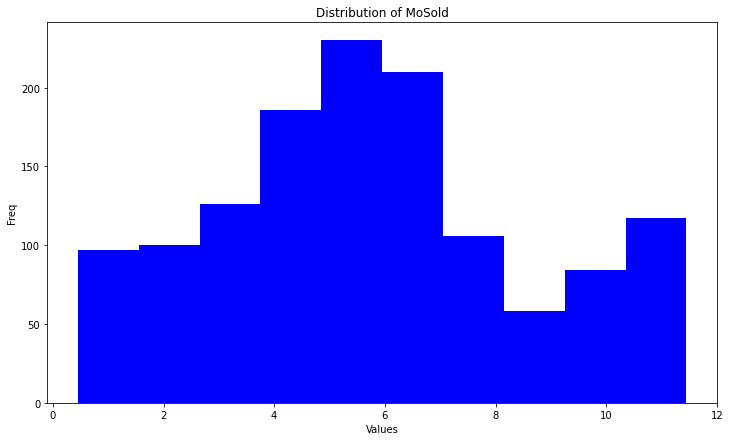

In [168]:
# MoSold: Month Sold (MM)
feature = 'MoSold'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

I can see that there tends to be more sales during from april to july. The month of the sale might have an impact of `SalePrice` so I will keep this feature.

Feature name: YrSold
The median of the variable YrSold is 2008.00.
The mode of the variable YrSold is 2007.00.
The max value of the variable YrSold is 2010.00.
The min value of the variable YrSold is 2006.00.
The first quartile of the variable YrSold is 2007.00.
The third quartile of the variable YrSold is 2009.00.
The IQR of the variable YrSold is 2.00.


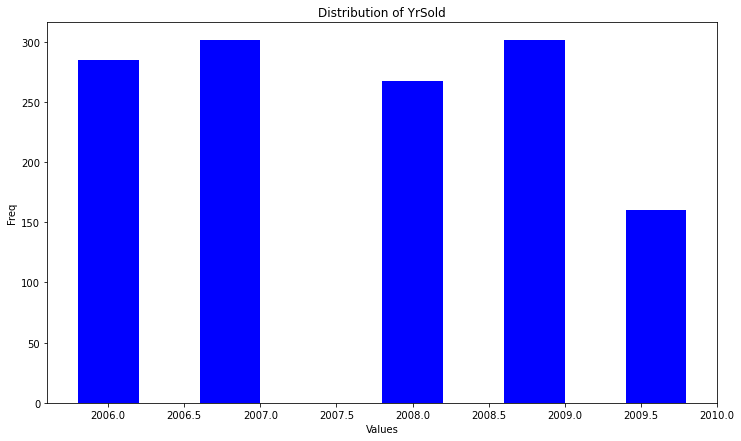

In [169]:
# YrSold: Year Sold (YYYY)mm
feature = 'YrSold'
print("Feature name: {}".format(feature))
print_summary_statistics(numerical_train, feature, outliers=True)
plot_hist(numerical_train, feature, 10)

Similarly, I will keep this one as well.

In [282]:
# print features to be dropped
print("Features to be dropped: {}".format(toDrop_features))

Features to be dropped: ['Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtUnfSF', 'GarageYrBlt', 'GarageFinish', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LotShape', 'MSZoning', 'Utilities', 'LotConfig', 'LandSlope', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtExposure', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'FireplaceQu', 'PavedDrive', 'SaleType', 'SaleCondition', 'GarageCars', 'Condition2', 'HouseStyle']


In [182]:
# print unique outlier ids to be dropped
print("Outlier ids to be dropped: {}".format(list(set(outliers_ids))))

Outlier ids to be dropped: [707, 452, 935, 186, 250, 524, 333, 336, 497, 1170, 1299, 692, 441, 314, 1183]


**Summary**

- Numerical features to be dropped stored in toDrop_features.
- Outliers ids to be dropped stores in outliers_ids.
- I need to do some feature engineering to combine features about floor areas/quality, basement types, etc.
- `YearBuilt` is exponentially distributed. I will log transform this feature.

#### Categorical Features

In [183]:
# create a numerical features subset
categorical_cols = train_data.describe(exclude=np.number).columns
categorical_train = train_data.loc[:, list(categorical_cols)].copy()
categorical_train

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
489,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
75,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,BuiltIn,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
1112,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
47,FV,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1270,RL,Pave,NaN,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,FV,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial
1102,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnWw,NaN,WD,Family
1345,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
389,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial


In [188]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [187]:
# MSZoning: Identifies the general zoning classification of the sale.
categorical_train['MSZoning'].value_counts()

RL         1031
RM          203
FV           59
RH           14
C (all)       7
Name: MSZoning, dtype: int64

In [198]:
# store features to be one-hot encoded in a list
toOneHot_features = []

With `MSSubClass`, I have info about the type of dwelling.
`MSZoning` gives the general zoning classification but I don't have all the classes in the training set so I will drop it for simplicity.

In [200]:
toDrop_features.append('MSZoning')

In [189]:
# Street: Type of road access to property
categorical_train['Street'].value_counts()

Pave    1309
Grvl       5
Name: Street, dtype: int64

This is just **binary encoding**. I will keep it.

In [196]:
# store features to be label encoded in a list
toLabelEncode_features = ['Street']

In [190]:
# LotShape: General shape of property

Unlikely to be relevant. I will drop it.

In [192]:
toDrop_features.append('LotShape')

In [193]:
# LandContour: Flatness of the property
categorical_train['LandContour'].value_counts()

Lvl    1178
Bnk      58
HLS      44
Low      34
Name: LandContour, dtype: int64

I will **one-hot encode** this variable.

In [199]:
toOneHot_features.append('LandContour')

In [197]:
# Utilities: Type of utilities available
categorical_train['Utilities'].value_counts()

AllPub    1313
NoSeWa       1
Name: Utilities, dtype: int64

I don't have all the categories in the training set so I will drop it for simplicity.

In [201]:
toDrop_features.append('Utilities')

In [202]:
# LotConfig: Lot configuration
categorical_train['LotConfig'].value_counts()

Inside     950
Corner     240
CulDSac     85
FR2         37
FR3          2
Name: LotConfig, dtype: int64

Not sure what this feature means or if it is applicable to all houses. I will drop it.

In [203]:
toDrop_features.append('LotConfig')

From here, I am going to look at the most relevant categorical features (by intuition) and drop the rest for simplicity.

In [205]:
toDrop_features.extend(['LandSlope', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType'
                       'Foundation', 'BsmtExposure', 'Heating', 'HeatingQC', 'Electrical', 'Functional',
                       'FireplaceQu', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [212]:
# Neighborhood: Physical locations within Ames city limits
categorical_train['Neighborhood'].value_counts().sort_index()

Blmngtn     15
Blueste      1
BrDale      13
BrkSide     47
ClearCr     26
CollgCr    135
Crawfor     49
Edwards     94
Gilbert     71
IDOTRR      33
MeadowV     17
Mitchel     46
NAmes      200
NPkVill      8
NWAmes      64
NoRidge     37
NridgHt     68
OldTown    106
SWISU       23
Sawyer      67
SawyerW     54
Somerst     76
StoneBr     23
Timber      34
Veenker      7
Name: Neighborhood, dtype: int64

This is a tricky feature to encode. I would go for One-Hot encoding, but I don't have many instances for high-cardinality data. If I label encode the feature, there will be a risk of the model learning this feature as ordinal data.

I will try Owen Zhang's leaveoneout strategy.

In [213]:
# Condition1: Proximity to various conditions
categorical_train['Condition1'].value_counts().sort_index()

Artery      44
Feedr       73
Norm      1136
PosA         8
PosN        16
RRAe        11
RRAn        20
RRNe         2
RRNn         4
Name: Condition1, dtype: int64

I am gonna one-hot encode this feature.

In [217]:
toOneHot_features.append('Condition1')

In [214]:
# Condition2: Proximity to various conditions
categorical_train['Condition2'].value_counts().sort_index()

Artery       2
Feedr        4
Norm      1302
PosA         1
PosN         2
RRAe         1
RRNn         2
Name: Condition2, dtype: int64

I will drop this feature and consider `Condition1` only.

In [208]:
# drop 'GarageCars' as well
toDrop_features.append('GarageCars')

In [215]:
# drop 'Condition2' as well
toDrop_features.append('Condition2')

In [216]:
# BldgType: Type of dwelling
categorical_train['BldgType'].value_counts().sort_index()

1Fam      1103
2fmCon      30
Duplex      44
Twnhs       37
TwnhsE     100
Name: BldgType, dtype: int64

I will **label encode** this feature.

In [228]:
toLabelEncode_features.append('BldgType')

In [224]:
# drop 'Condition2' as well
toDrop_features.append('HouseStyle')

In [225]:
# ExterQual: Evaluates the quality of the material on the exterior 
categorical_train['ExterQual'].value_counts().sort_index()

Ex     43
Fa     12
Gd    438
TA    821
Name: ExterQual, dtype: int64

In [226]:
# ExterCond: Evaluates the present condition of the material on the exterior
categorical_train['ExterCond'].value_counts().sort_index()

Ex       3
Fa      26
Gd     126
TA    1159
Name: ExterCond, dtype: int64

I am gonna create new attribute off this 2 in the feature engineering section.

In [227]:
# CentralAir: Central air conditioning
categorical_train['CentralAir'].value_counts().sort_index()

N      86
Y    1228
Name: CentralAir, dtype: int64

Binary encoding.

In [229]:
toLabelEncode_features.append('CentralAir')

**Summary**

- All features to be dropped stored in toDrop_features.
- All features to be one-hot encoded stored in toOneHot_features.
- All featuers to be ordinal / label encoded stored in toLabelEncode_features.
- The following features will be feature engineered:
    - `ExterQual` and `ExternalCond`
    - `BsmtFinType1`, `BsmtQual` and `BsmtCond` along with basement numerical features
    - `KitchenQual` along with `KitchenAbvGr`
    - `GarageQual` and `GarageCond` along with `GarageArea` numerical feature

### Multivariate analysis 

In [237]:
toDrop_features.pop(toDrop_features.index('MasVnrTypeFoundation'))

'MasVnrTypeFoundation'

In [283]:
# drop features that won't be used
multi_train = train_data.drop(toDrop_features, axis=1).copy()
# drop outliers
multi_train = multi_train.loc[multi_train['Id'].isin(outliers_ids) == False, :]
multi_train

,Id,MSSubClass,LotFrontage,LotArea,Street,LandContour,Neighborhood,Condition1,BldgType,OverallQual,...,GarageType,GarageArea,GarageQual,GarageCond,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
489,490,180,21.0,1526,Pave,Lvl,MeadowV,Norm,Twnhs,4,...,Attchd,286,TA,TA,0,NaN,0,5,2009,86000
75,76,180,21.0,1596,Pave,Lvl,MeadowV,Norm,Twnhs,4,...,BuiltIn,297,TA,TA,0,NaN,0,11,2009,91000
1112,1113,20,73.0,7100,Pave,Lvl,NAmes,Norm,1Fam,5,...,Detchd,308,TA,TA,0,NaN,0,7,2006,129900
47,48,20,84.0,11096,Pave,Lvl,Somerst,Norm,1Fam,8,...,Attchd,826,TA,TA,0,NaN,0,7,2007,249700
1270,1271,40,NaN,23595,Pave,Low,ClearCr,Norm,1Fam,7,...,Attchd,586,TA,TA,0,NaN,0,4,2010,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,60,65.0,8125,Pave,Lvl,Somerst,Norm,1Fam,7,...,Attchd,614,TA,TA,0,NaN,0,8,2006,197000
1102,1103,20,70.0,7000,Pave,Lvl,NAmes,Norm,1Fam,5,...,Attchd,254,TA,TA,0,NaN,0,4,2007,135000
1345,1346,30,50.0,6000,Pave,Lvl,OldTown,Norm,1Fam,4,...,Detchd,308,TA,TA,0,NaN,0,7,2007,108500
389,390,60,96.0,12474,Pave,Lvl,NridgHt,Norm,1Fam,10,...,BuiltIn,846,TA,TA,0,NaN,0,8,2008,426000


In [284]:
#Compute correlation matrix (Pearsons´coeff)
corr_matrix = multi_train.corr()
#Correlation of each attribute with Sale Price
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.797331
GrLivArea       0.714408
GarageArea      0.634329
TotalBsmtSF     0.633124
1stFlrSF        0.609448
FullBath        0.574889
YearBuilt       0.547344
TotRmsAbvGrd    0.537284
MasVnrArea      0.478826
Fireplaces      0.458531
BsmtFinSF1      0.369717
LotFrontage     0.366715
LotArea         0.350930
2ndFlrSF        0.314069
HalfBath        0.296222
BsmtFullBath    0.214131
BedroomAbvGr    0.180280
MoSold          0.047486
PoolArea        0.037971
YrSold         -0.012307
Id             -0.016851
MiscVal        -0.018715
BsmtHalfBath   -0.028708
LowQualFinSF   -0.060988
OverallCond    -0.078259
MSSubClass     -0.088795
KitchenAbvGr   -0.136058
Name: SalePrice, dtype: float64

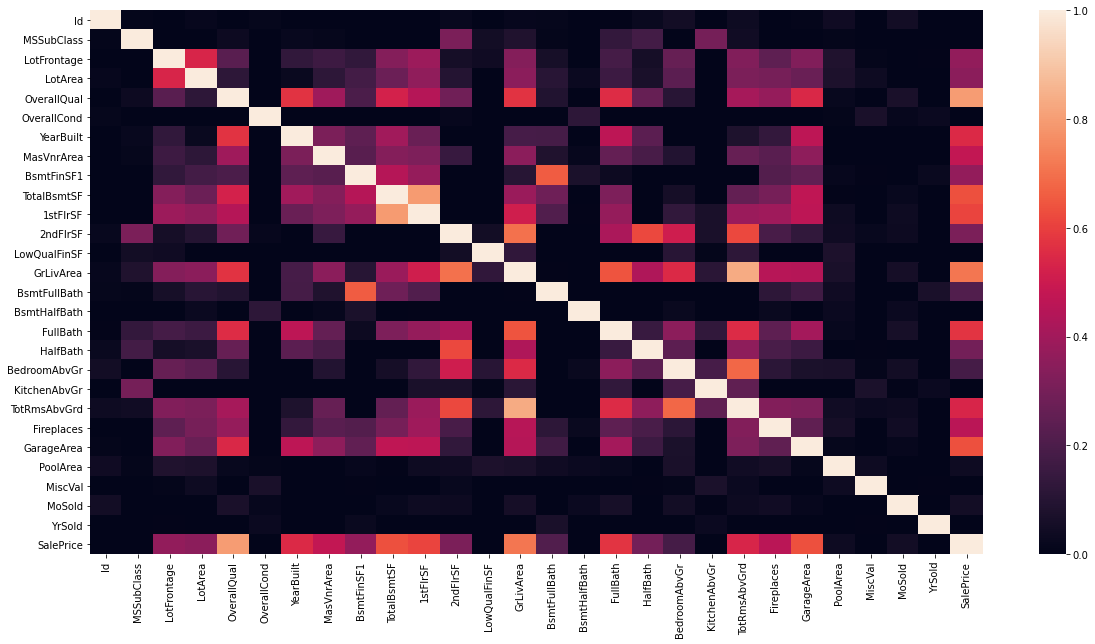

In [285]:
# plot a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, vmin=0, vmax=1);

I am gonna plot a scatter matrix of the more correlated features with `SalePrice`.

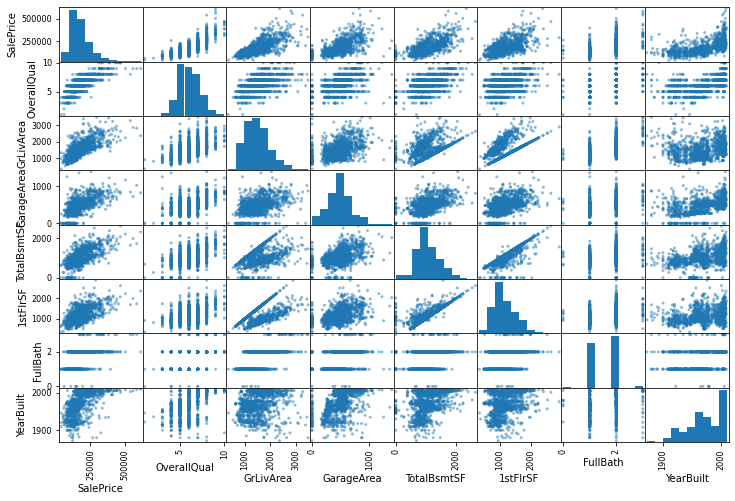

In [286]:
#Plot scatter matrix of some promising attributes
from pandas.plotting import scatter_matrix

features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

scatter_matrix(multi_train[features], figsize=(12,8));

I can see some good linear positive correlations.

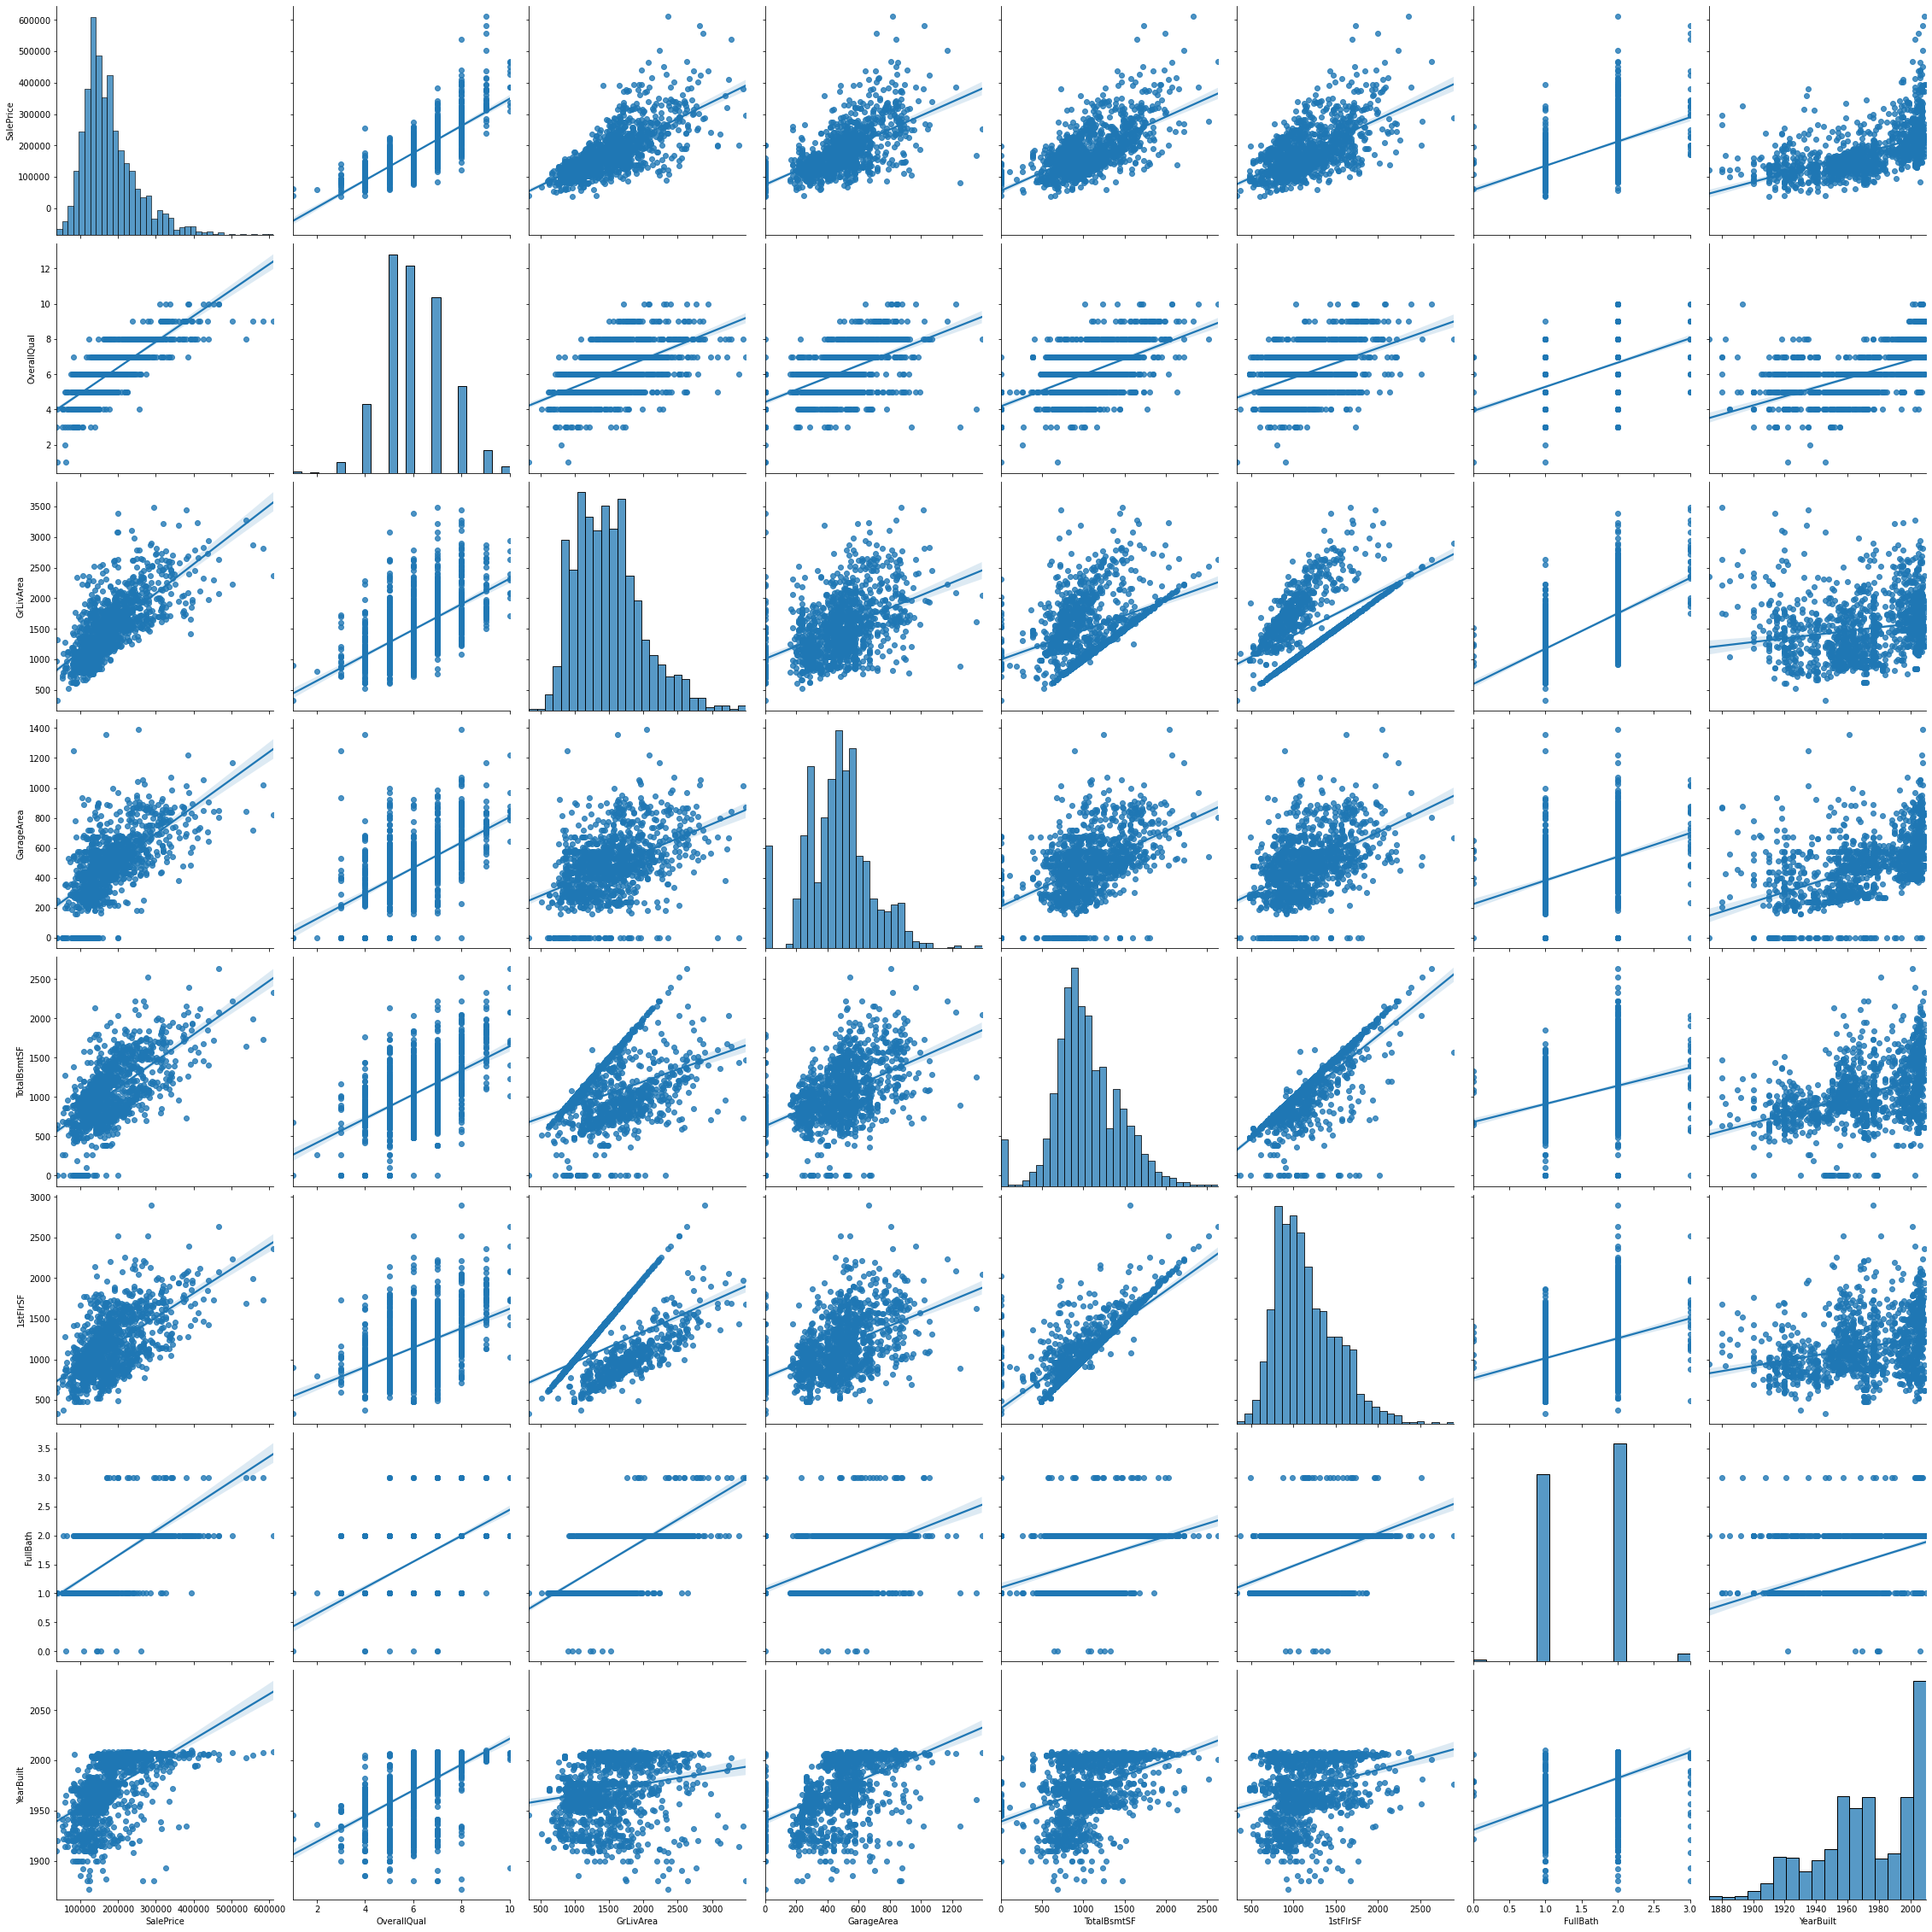

In [287]:
sns.pairplot(multi_train, height=4, vars=features, kind='reg');

## 3. Data Preparation

- Clean data: Features and Outliers
- Impute missing values
- Feature Engineering
- Log transform `YearBuilt`
- Encoding categorical features
- Feature scaling

### Cleaning data

In [288]:
def clean_data(data, toDrop_features=toDrop_features, outliers=outliers_ids, training=True):
    """It performs cleaning steps on data.
    
    Parameters:
    __________
    data: Pandas DataFrame
    toDrop_features: list, features that will be dropped
    outliers: list, ids of outliers that will be dropped
    training: boolean, if cleaning is perform on training data, outliers will be dropped. Default True
    
    Returns:
    __________
    cleaned_data: Pandas DataFrame, df with cleaned data
    """
    # drop features that won't be used
    cleaned_data = data.drop(toDrop_features, axis=1).copy()
    
    # drop outliers
    if training:
        cleaned_data = cleaned_data.loc[cleaned_data['Id'].isin(outliers_ids) == False, :].copy()
        
    # log transform YearBuilt
    cleaned_data['YearBuilt'] = np.log(cleaned_data['YearBuilt'])
    
    return cleaned_data

In [303]:
# Fix: I forgot to add  'MasVnrType' and 'MasVnrArea' to the list
toDrop_features.extend(['MasVnrType', 'MasVnrArea'])

### Missing values

In [304]:
def check_mv_prop(df, p, toDrop=True):
    """It checks the proportion of missing values for each col and prints which cols have more than p% missing values.
    INPUT:
    df: Pandas dataframe.
    p: float. Missing values proportion threshold.
    toDrop: Boolean. If true, condition is propotion of mv > p. condition is propotion of mv < p otherwise.

    OUTPUT:
    toDrop_lst: list of columns be dropped if toDrop = True.
    toImpute_lst: list of columns to be imputed if toImpute_lst = True.
    """
    mvs = df.isnull().sum()
    if toDrop:
        toDrop_lst = []
        for col in df.columns:
            if mvs.loc[col] / df.shape[0] > p:
                print("{:.2f}% of {} are missing values".format((df.isnull().sum().loc[col] / df.shape[0]) * 100, col))
                toDrop_lst.append(col)
        return toDrop_lst
    else:
        toImpute_lst = []
        for col in df.columns:
            if mvs.loc[col] / df.shape[0] <= p and mvs.loc[col] / df.shape[0] > 0:
                print("{:.2f}% of {} are missing values".format((df.isnull().sum().loc[col] / df.shape[0]) * 100, col))
                toImpute_lst.append(col)
        return toImpute_lst

In [305]:
# clean data
cleaned_data = clean_data(train_data)

In [306]:
# check prop of missing values - Threshold > 20%
check_mv_prop(cleaned_data, p=0.2, toDrop=True)

99.62% of PoolQC are missing values


['PoolQC']

I wanted to further investigate this feature and see how it relates to `PoolArea`.

In [307]:
cleaned_data.loc[cleaned_data['PoolArea'] > 0, ['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
810,648,Fa
1423,738,Gd
1386,519,Fa
1170,576,Gd
197,512,Ex


In [308]:
cleaned_data[cleaned_data['PoolQC'].isnull() == False]['Id']

810      811
1423    1424
1386    1387
1170    1171
197      198
Name: Id, dtype: int64

So for properties that have a pool (`PoolArea` > 0), I have a `PoolQC` value. I can come up with a combined attribute here as well.

In [309]:
# check prop of missing values - Features to be imputed Threshold < 20%
check_mv_prop(cleaned_data, p=0.2, toDrop=False)

17.17% of LotFrontage are missing values
2.54% of BsmtQual are missing values
2.54% of BsmtCond are missing values
2.54% of BsmtFinType1 are missing values
5.54% of GarageType are missing values
5.54% of GarageQual are missing values
5.54% of GarageCond are missing values


['LotFrontage',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'GarageType',
 'GarageQual',
 'GarageCond']

Strategies for imputing missing values:

- Numerical features: Impute with mean
- Categorical features: Impute with mode

In [316]:
from sklearn.impute import SimpleImputer

In [480]:
def impute_mv(data, test_data=None, only_train=True):
    
    # find features to be imputed
    features = check_mv_prop(data, p=0.2, toDrop=False)
    
    # all numerical and categorical features
    num_features = list(data.describe().columns)
    cat_features = list(data.describe(exclude=np.number).columns)
    
    # features to be imputed
    num_features_to_impute = [feature for feature in features if feature in num_features]
    cat_features_to_impute = [feature for feature in features if feature in cat_features]
    
    # instantiate imputers
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missign values of numerical features
    num_data_no_mv = num_imputer.fit_transform(data[num_features_to_impute])
    data = data.drop(num_features_to_impute, axis=1)
    data[num_features_to_impute] = num_data_no_mv
    
    if only_train == False:
        # Transform test data
        num_test_data_no_mv = num_imputer.transform(test_data[num_features_to_impute])
        test_data = test_data.drop(num_features_to_impute, axis=1)
        test_data[num_features_to_impute] = num_test_data_no_mv
    
    # impute missign values of categorical features
    cat_data_no_mv = cat_imputer.fit_transform(data[cat_features_to_impute])
    data = data.drop(cat_features_to_impute, axis=1)
    data[cat_features_to_impute] = cat_data_no_mv
    
    if only_train == False:
        # Transform test data
        cat_test_data_no_mv = cat_imputer.transform(test_data[cat_features_to_impute])
        test_data = test_data.drop(cat_features_to_impute, axis=1)
        test_data[cat_features_to_impute] = cat_test_data_no_mv
    
    # returns
    if only_train == False:
        imputed_data = data
        imputed_test_data = test_data
        return imputed_data, imputed_test_data
    else:
        imputed_data = data
        return imputed_data

In [335]:
# impute missing values
imputed_data = impute_mv(cleaned_data)

17.17% of LotFrontage are missing values
2.54% of BsmtQual are missing values
2.54% of BsmtCond are missing values
2.54% of BsmtFinType1 are missing values
5.54% of GarageType are missing values
5.54% of GarageQual are missing values
5.54% of GarageCond are missing values


In [343]:
imputed_data['GarageQual'].value_counts()

TA    1237
Fa      43
Gd      14
Po       3
Ex       2
Name: GarageQual, dtype: int64

### Feature Engineering

**Basement Features**

basement_indicator = `BsmtFinType1` * `BsmtFinSf1` + (`BsmtCond` + 0.5 * `BsmtQual`) * `TotalBsmtSF` [equivalent square feet]

**Floor Features**

floor_indicator = `1stFlrSF` + `2ndFlrSF` - `LowQualFinSF` [equivalent square feet]

**Kitchen Features**

kitchen_indicator = `KitchenQual` * `KitchenAbvGr`

**Garage Features**

garage_indicator = (0.5 * `GarageQual` + `GarageCond`) * `GarageArea` [equivalent square feet]

**Pool Features**

pool_indicator = `PoolQC` * `PoolArea` [equivalent square feet]

In [362]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombineFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return None
        
    def fit(self, X, y=None):
        return self
    
    def _bsmt_qual_cond_encoder(self, x):
        if x == 'Ex':
            x = 5
        elif x == 'Gd':
            x = 4
        elif x == 'TA':
            x = 3
        elif x == 'Fa':
            x = 2
        elif x == 'Po':
            x = 1
        else:
            x = 0
        return x
    
    def _bsmt_fintype_encoder(self, x):
        if x == 'GLQ':
            x = 6
        elif x == 'ALQ':
            x = 5
        elif x == 'BLQ':
            x = 4
        elif x == 'Rec':
            x = 3
        elif x == 'LwQ':
            x = 2
        elif x == 'Unf':
            x = 1
        else:
            x = 0
        return x
    
    def _kitchen_qual_encoder(self, x):
        if x == 'Ex':
            x = 5
        elif x == 'Gd':
            x = 4
        elif x == 'TA':
            x = 3
        elif x == 'Fa':
            x = 2
        elif x == 'Po':
            x = 1
        return x
    
    def _pool_qual_encoder(self, x):
        if x == 'Ex':
            x = 4
        elif x == 'Gd':
            x = 3
        elif x == 'TA':
            x = 2
        elif x == 'Fa':
            x = 1
        else:
            x = 0
        return x
    
    def transform(self, X, y=None):
        # basement features
        # encode 'BsmtQual' and 'BsmtCond'
        X['BsmtQual'] = X['BsmtQual'].apply(self._bsmt_qual_cond_encoder)
        X['BsmtCond'] = X['BsmtCond'].apply(self._bsmt_qual_cond_encoder)
        # encode 'BsmtFinType1'
        X['BsmtFinType1'] = X['BsmtFinType1'].apply(self._bsmt_fintype_encoder)
        # create basement_indicator
        basement_indicator = X['BsmtFinType1'] * X['BsmtFinSF1'] + (X['BsmtCond'] + 0.5 * X['BsmtQual']) * X['TotalBsmtSF']
        
        # floor features
        floor_indicator = X['1stFlrSF'] + X['2ndFlrSF'] - X['LowQualFinSF']
        
        # kitchen features
        # encode 'KitchenQual'
        X['KitchenQual'] = X['KitchenQual'].apply(self._kitchen_qual_encoder)
        # create kitchen indicator
        kitchen_indicator = X['KitchenQual'] * X['KitchenAbvGr']
        
        # garage features
        # encode 'GarageQual' and 'GarageQual' - Note same categories as 'BsmtQual' and 'BsmtCond'
        X['GarageQual'] = X['GarageQual'].apply(self._bsmt_qual_cond_encoder)
        X['GarageCond'] = X['GarageCond'].apply(self._bsmt_qual_cond_encoder)
        # create garage indicator
        garage_indicator = (0.5 * X['GarageQual'] + X['GarageCond']) * X['GarageArea']
        
        # pool features
        # encode 'PoolQC'
        X['PoolQC'] = X['PoolQC'].apply(self._pool_qual_encoder)
        # create pool indicator
        pool_indicator = X['PoolQC'] * X['PoolArea']
        
        # drop original features and add combined features
        X = X.drop(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'KitchenQual', 'KitchenAbvGr', 'GarageQual', 'GarageCond', 'GarageArea',
                     'PoolQC', 'PoolArea'], axis=1).copy()
        X['basement_indicator'] = basement_indicator
        X['floor_indicator'] = floor_indicator
        X['kitchen_indicator'] = kitchen_indicator
        X['garage_indicator'] = garage_indicator
        X['pool_indicator'] = pool_indicator
        
        return X

In [368]:
# instantiate class
combine_features = CombineFeatures()
# transform data
combined_data = combine_features.fit_transform(imputed_data)
combined_data

,Id,MSSubClass,LotArea,Street,LandContour,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,...,MoSold,YrSold,SalePrice,LotFrontage,GarageType,basement_indicator,floor_indicator,kitchen_indicator,garage_indicator,pool_indicator
489,490,180,1526,Pave,Lvl,MeadowV,Norm,Twnhs,4,8,...,5,2009,86000,21.000000,Attchd,0.0,630,4,0.0,0
75,76,180,1596,Pave,Lvl,MeadowV,Norm,Twnhs,4,5,...,11,2009,91000,21.000000,BuiltIn,0.0,988,3,0.0,0
1112,1113,20,7100,Pave,Lvl,NAmes,Norm,1Fam,5,7,...,7,2006,129900,73.000000,Detchd,0.0,816,3,0.0,0
47,48,20,11096,Pave,Lvl,Somerst,Norm,1Fam,8,5,...,7,2007,249700,84.000000,Attchd,0.0,1656,4,0.0,0
1270,1271,40,23595,Pave,Low,ClearCr,Norm,1Fam,7,6,...,4,2010,260000,69.695167,Attchd,0.0,1524,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,60,8125,Pave,Lvl,Somerst,Norm,1Fam,7,5,...,8,2006,197000,65.000000,Attchd,0.0,1576,4,0.0,0
1102,1103,20,7000,Pave,Lvl,NAmes,Norm,1Fam,5,7,...,4,2007,135000,70.000000,Attchd,0.0,1134,3,0.0,0
1345,1346,30,6000,Pave,Lvl,OldTown,Norm,1Fam,4,4,...,7,2007,108500,50.000000,Detchd,0.0,960,2,0.0,0
389,390,60,12474,Pave,Lvl,NridgHt,Norm,1Fam,10,5,...,8,2008,426000,96.000000,BuiltIn,0.0,2332,5,0.0,0


### Encoding

In [372]:
print("Features to be one-hot encoded: {}".format(toOneHot_features))
print("Features to be binary / ordinal encoded: {}".format(toLabelEncode_features))
print("Feature to be leaveoneout encoded: {}".format("'Neighborhood'"))

Features to be one-hot encoded: ['LandContour', 'Condition1']
Features to be binary / ordinal encoded: ['Street', 'BldgType', 'CentralAir']
Feature to be leaveoneout encoded: 'Neighborhood'


### Preprocessing Pipeline

In [406]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder

# clean data
cleaned_train = clean_data(train_data)
clean_val = clean_data(val_data, toDrop_features=toDrop_features, outliers=outliers_ids, training=False)

# impute missing values
imputed_train, imputed_val = impute_mv(cleaned_train, test_data=clean_val, only_train=False)

# separate target from predictors
X_train, y_train = imputed_train.drop('SalePrice', axis=1).copy(), imputed_train['SalePrice'].copy()
X_val, y_val = imputed_val.drop('SalePrice', axis=1).copy(), imputed_val['SalePrice'].copy()

# define cols for each preprocessing pipeline
t_1_cols = list(X_train.describe().columns)
t_1_cols.extend(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'LowQualFinSF', 'KitchenQual', 'KitchenAbvGr', 'GarageQual', 'GarageCond', 'GarageArea',
                 'PoolQC', 'PoolArea'])

t_1_cols = list(set(t_1_cols)) # make sure there are not duplicates
ord_cat_cols = ['Street', 'BldgType', 'CentralAir']
one_hot_cat_cols = ['LandContour', 'Condition1']
loo_cat_cols = 'Neighborhood'

# preprocessing numerical and combined features
transformer_1 = Pipeline(steps=[
    ('CombineFeatures', CombineFeatures()),
    ('Scaler', StandardScaler())
])

# preprocessing categorical data - Ordinal encoding
ord_cat_transformer = Pipeline(steps=[
    ('Ordinal_Enconder', OrdinalEncoder()),
    ('Scaler', StandardScaler())
])

# preprocessing categorical data - One-hot encoding
ohehot_cat_transformer = Pipeline(steps=[
    ('One_hot_Enconder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# preprocessing categorical data - Leaveoneout encoding
loo_cat_transformer = Pipeline(steps=[
    ('Leave_one_out_encoder', LeaveOneOutEncoder()),
    ('Scaler', StandardScaler())
])

# bundle preprocessing for numerical and all categorical data
preprocessor = ColumnTransformer([
    ('t_1', transformer_1, t_1_cols),
    ('ord_cat', ord_cat_transformer, ord_cat_cols),
    ('oh_cat', ohehot_cat_transformer, one_hot_cat_cols),
    ('loo_cat', loo_cat_transformer, loo_cat_cols)
])

17.17% of LotFrontage are missing values
2.54% of BsmtQual are missing values
2.54% of BsmtCond are missing values
2.54% of BsmtFinType1 are missing values
5.54% of GarageType are missing values
5.54% of GarageQual are missing values
5.54% of GarageCond are missing values


## 4. Modeling

I am gonna spot-checked the following Linear Regression models:

- Linear Regression
- Ridge regression
- ElasticNet regression

In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# spot-check Linear Regression model
model = LinearRegression()
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Lin_model', model)
])

cv = 10 # set 10 splits
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
print('RMSE:', -scores.mean())

RMSE: 25803.450241235572


In [419]:
# spot-check Ridge regularized model
from sklearn.linear_model import Ridge

model = Ridge()
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Lin_model', model)
])

cv = 10 # set 10 splits
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
print('RMSE:', -scores.mean())

RMSE: 25780.667808304774


In [420]:
# spot-check ElasticNet regularized model
from sklearn.linear_model import ElasticNet

model = ElasticNet()
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Lin_model', model)
])

cv = 10 # set 10 splits
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
print('RMSE:', -scores.mean())

RMSE: 27235.496534764785


In [421]:
# spot-check Lasso regularized model
from sklearn.linear_model import Lasso

model = Lasso()
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Lin_model', model)
])

cv = 10 # set 10 splits
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
print('RMSE:', -scores.mean())

RMSE: 25804.036748811435


The most promising model among these simple ones is a regularized ridge linear regression model. Ridge regulariazation works well when there is correlation between predictors. It does not work well when there are features that are not relevant but I tried to choose the better predictors in the feature selection step.

Let's try to fine-tune the hyperparameters.

In [426]:
model = Ridge(random_state=42)
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Lin_model', model)
])


pipeline.get_params()

{'memory': None,
 'steps': [('Preprocessing',
   ColumnTransformer(transformers=[('t_1',
                                    Pipeline(steps=[('CombineFeatures',
                                                     CombineFeatures()),
                                                    ('Scaler', StandardScaler())]),
                                    ['KitchenQual', 'BsmtFinSF1', 'MoSold',
                                     'GarageCond', 'BsmtFinType1', 'MiscVal',
                                     'BsmtQual', 'BsmtCond', 'HalfBath',
                                     'OverallQual', 'GarageQual', 'Fireplaces',
                                     'LotFrontage', 'GarageArea', 'LowQualFinSF',
                                     'BsmtHalfBath', 'KitchenAbvGr', 'Id',
                                     'T...
                                    Pipeline(steps=[('Ordinal_Enconder',
                                                     OrdinalEncoder()),
                              

For simplicity, I will just run a GridSearchCV on the model's parameters.

In [458]:
# define parameters for GridSearchCV
parameters = {
    'Lin_model__alpha': [35.0, 37.5, 40.0],
    'Lin_model__solver': ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')
}

In [459]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(pipeline, parameters, scoring='neg_root_mean_squared_error', n_jobs=-1)
cv.fit(X_train, y_train)
cv.best_params_

{'Lin_model__alpha': 37.5, 'Lin_model__solver': 'sparse_cg'}

## 5. Model Validation

In [460]:
from sklearn.metrics import mean_squared_error

# make predictions on val set
y_pred = cv.predict(X_val)

# score
print("RMSE on validation set: {}".format(mean_squared_error(y_val, y_pred, squared=False)))

RMSE on validation set: 26900.8489437633


This performance is not great.

In [462]:
raw_data['SalePrice'].mean()

180921.19589041095

The mean price of a property is 180,921$. Our mean error is about 15%.

Let's see where we are in the leaderboard with this simple model.

In [463]:
# load in test.csv file
test_dataset = load_data('../data/test.csv', sep=',')
test_dataset.shape

(1459, 80)

In [466]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [483]:
def impute_mv_test(train_data, test_data):
    
    # find features to be imputed
    features = check_mv_prop(test_data, p=0.2, toDrop=False)
    
    # all numerical and categorical features
    num_features = list(test_data.describe().columns)
    cat_features = list(test_data.describe(exclude=np.number).columns)
    
    # features to be imputed
    num_features_to_impute = [feature for feature in features if feature in num_features]
    cat_features_to_impute = [feature for feature in features if feature in cat_features]
    
    # instantiate imputers
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missign values of numerical features
    num_imputer.fit(train_data[num_features_to_impute])
    num_test_data_no_mv = num_imputer.transform(test_data[num_features_to_impute])
    test_data = test_data.drop(num_features_to_impute, axis=1)
    test_data[num_features_to_impute] = num_test_data_no_mv
    
    # impute missign values of categorical features
    cat_imputer.fit(train_data[cat_features_to_impute])
    cat_test_data_no_mv = cat_imputer.transform(test_data[cat_features_to_impute])
    test_data = test_data.drop(cat_features_to_impute, axis=1)
    test_data[cat_features_to_impute] = cat_test_data_no_mv
    
    return test_data

In [489]:
# clean data
cleaned_test = clean_data(test_dataset, toDrop_features=toDrop_features, outliers=outliers_ids, training=False)

# impute missing values
X_test = impute_mv_test(train_data=cleaned_train, test_data=cleaned_test)
X_test = X_test[X_train.columns.tolist()] # reorder cols to match traininig

# make predictions on test set
y_pred = cv.predict(X_test)

15.56% of LotFrontage are missing values
3.02% of BsmtQual are missing values
3.08% of BsmtCond are missing values
2.88% of BsmtFinType1 are missing values
0.07% of BsmtFinSF1 are missing values
0.07% of TotalBsmtSF are missing values
0.14% of BsmtFullBath are missing values
0.14% of BsmtHalfBath are missing values
0.07% of KitchenQual are missing values
5.21% of GarageType are missing values
0.07% of GarageArea are missing values
5.35% of GarageQual are missing values
5.35% of GarageCond are missing values


In [492]:
results = pd.DataFrame(columns=['Id', 'SalePrice'])
results['Id'] = X_test['Id']
results['SalePrice'] = y_pred
results.head()

,Id,SalePrice
0,1461,122503.943759
1,1462,162664.561142
2,1463,193632.861662
3,1464,204214.783230
4,1465,216421.856638


In [494]:
# export as .csv
results.to_csv('submission.csv',index=False )

It turns out that I improved my last submission:

Your Best Entry 
Your submission scored 18194.43564, which is an improvement of your previous score of 20998.83780. Great job!